In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
print(df.dtypes)

Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [ ]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')
print(df['Дата'].head())
print(df['Дата'].isnull().sum()) 


0   2018-01-04
1   2018-01-04
2   2018-01-04
3   2018-01-04
4   2018-01-04
Name: Дата, dtype: datetime64[ns]
0


Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
grouped_df = df.groupby('Дата').size().reset_index(name='Количество продаж')

Вывести несколько первых строк сгруппированных данных

In [6]:
grouped_df.head()

,Дата,Количество продаж
0,2018-01-04,1840
1,2018-01-05,1301
2,2018-01-06,1306
3,2018-01-07,1322
4,2018-01-09,1719


Нарисуйте график продаж у `grouped_df`

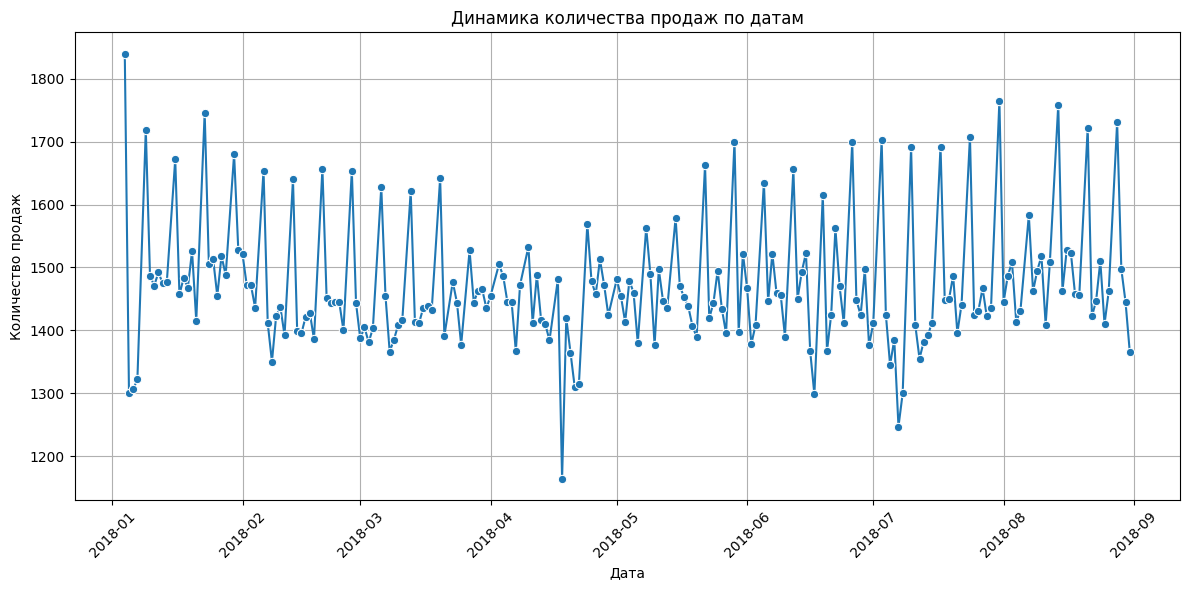

In [7]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Дата', y='Количество продаж', marker='o')
plt.xticks(rotation=45)
plt.title('Динамика количества продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.tight_layout()

plt.show()


Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
Это линейная диаграмма,которая показывает динамику продаж по датам

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [9]:
# Identifying the row with the maximum outlier based on 'Количество'
max_sales_row = df.loc[df['Количество'].idxmax()]

print(max_sales_row)


Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [12]:
df['Дата'] = pd.to_datetime(df['Дата'], format='%Y-%m-%d', errors='coerce')
filtered_df = df[(df['Дата'].dt.month.isin([6, 7, 8])) & (df['Склад'] == 3)]
wednesday_df = filtered_df[filtered_df['Дата'].dt.dayofweek == 2]
top_product = wednesday_df.groupby('Номенклатура')['Количество'].sum().reset_index().sort_values(by='Количество', ascending=False).head(1)

print(top_product)


  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [ ]:
# Прочитайте данные (переменную назовите 'df')
weather_df = pd.read_excel('35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls')


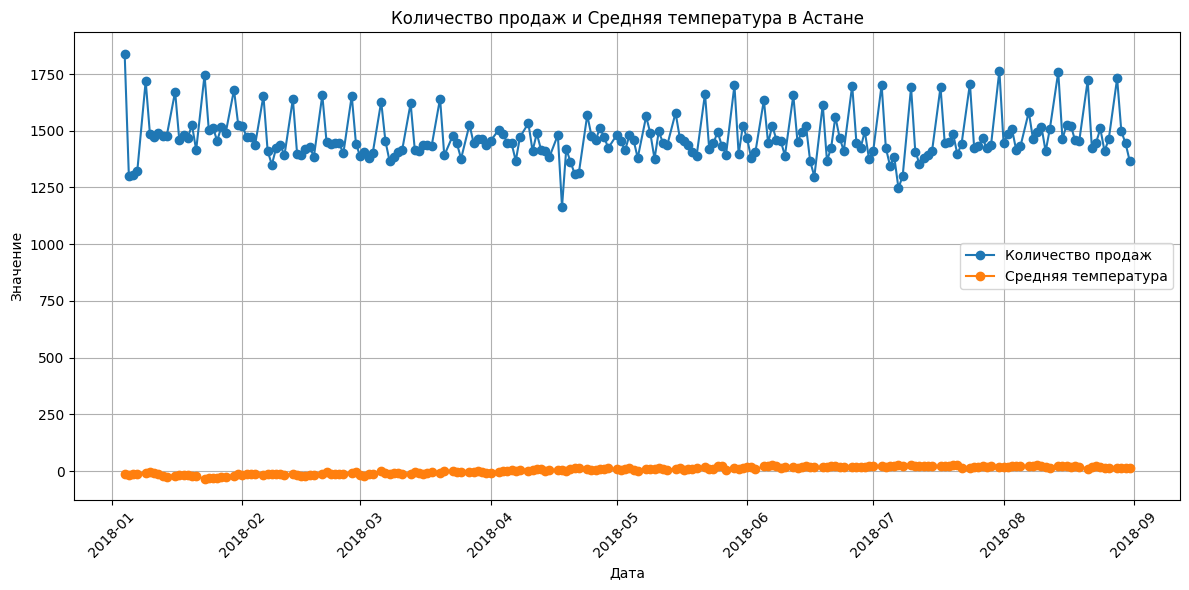

In [26]:
weather_df = weather_df[['Местное время в Астане', 'T']]
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], format='%d.%m.%Y %H:%M', errors='coerce')
weather_df.dropna(subset=['Местное время в Астане'], inplace=True)
weather_df['Дата'] = weather_df['Местное время в Астане'].dt.date
daily_avg_temp = weather_df.groupby('Дата')['T'].mean().reset_index()
daily_avg_temp.rename(columns={'T': 'Средняя температура'}, inplace=True)
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date
merged_df = pd.merge(grouped_df, daily_avg_temp, on='Дата', how='inner')

plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Количество продаж'], label='Количество продаж', marker='o')
plt.plot(merged_df['Дата'], merged_df['Средняя температура'], label='Средняя температура', marker='o')
plt.title('Количество продаж и Средняя температура в Астане')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

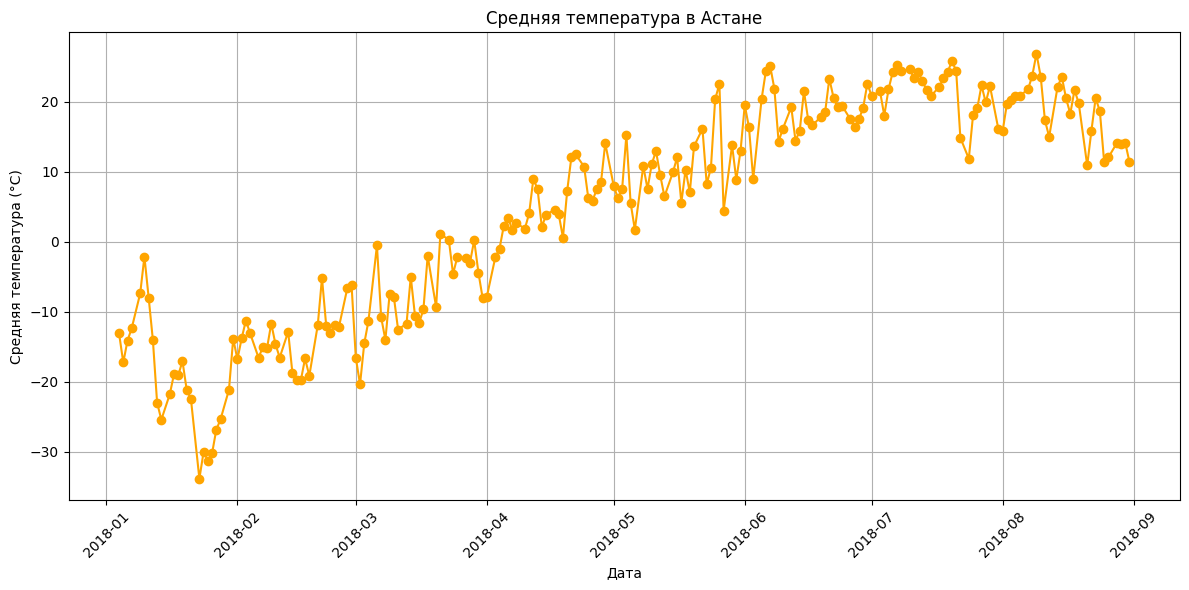

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Дата'], merged_df['Средняя температура'], marker='o', color='orange')
plt.title('Средняя температура в Астане')
plt.xlabel('Дата')
plt.ylabel('Средняя температура (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
